# A quick review of Data Analysis : Numerical Attributes

## Imports

In [3]:
%matplotlib inline
import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Probability and Statistics with Python

### Random Experiment

Examples :

1. **rolling a die** (for example, *Outcome* : 4)
2. **measuring the time to reach home** (for example, *Outcome* : 42 minutes)
3. **tomorrow's weather** ( for example, *Outcome* : Partly Cloudy)

Characteristics  :

* **Sample Space** (denoted $\Omega$) : the set of all possible outcomes
* **Outcome** : element of the sample space
* **Event** (denoted $E$) : subset of the sample space
* **Random Variable** (denoted $X$) : the numerial outcome of the experiment

If the *sample space* is **finite** or **countably infinite**, then the random variable is said to be **discrete**.

#### Experiment : rolling a die

* $\Omega = \{\omega_1, \omega_2, \ldots, \omega_6\}$
* $\omega_i$ : the outcome of getting the face that has $i$ dots
* $E = \{\omega_2, \omega_4, \omega_6\}$

**Exercise** - Complete the following code

In [88]:
# Experiment : rolling a die
sample_space = 

# Event : the result of the roll is an even number
event = 

print(sample_space, event)

{1, 2, 3, 4, 5, 6} {2, 4, 6}


A **trial** of a random experiment generates an outcome $\omega \in \Omega$.

In [89]:
import random

# The die is rolled once :
sample = random.sample(sample_space, 1)
print(sample)

outcome = sample[0]
print(outcome)

[1]
1


If $\omega \in E$, then it is said that event $E$ occured during the trial. 

In [90]:
if outcome in event:
    print('the result of the roll is an even number')

#### Axiomatic definition of probability

Probability distribution : $P : 2^{\Omega} \rightarrow \mathbb{R}$

1. $P(E) \geqslant 0$, for all event $E \subseteq \Omega$ 
1. $P(\Omega) = 1$
1. $P(E_1 \cup E_2) = P(E_1) + P(E_2)$, for any two mutually exclusive events $E_1$ and $E_2$ (*i.e.*, $E_1 \cap E_2 = \emptyset)$ 

Based on these axioms and elementary set theory :

1. $P(\emptyset) = 0$
1. If $E_1 \subseteq E_2$, then $P(E_1) \leqslant P(E_2)$
1. $P(\bar{E}) = 1 - P(E)$, where $\bar{E} = \Omega \backslash E$ is the *complement* of $E$
1. $P(E_1 \cup E_2) = P(E_1) + P(E_2) - P(E_1 \cap E_2)$, for any two events $E_1$ and $E_2$
1. $P(E) = \sum_{\omega \in E} P(\omega)$

#### The classical interpretation 

$$
\text{The probability of an event} = \frac{\text{Number of favourable outcomes}}{\text{Number of possible outcomes}}
$$

where all the possible **outcomes are equaly likely**.

For example, if we consider the experiment : "rolling a die". In this case the probability of getting an odd number id $3/6$, because each possible outcome is equally likely.

**Exercise** - Complete the following function definition :

In [123]:
from fractions import Fraction

def P(event, sample_space): 
    """The probability of an event,
    given a sample space of equiprobable outcomes.
    """
    return

p = P(event = {2, 4, 6}, sample_space = {1, 2, 3, 4, 5, 6})
print(p, float(p))

1/2 0.5


#### The frequency interpretation

$$
\text{The relative frequency of an event} = \frac{\text{Number of times the event has occured}}{\text{Number of observed cases}}
$$

Let $N$ denotes the number of times the random experiment is repeated and $N_E$ the number of times that event $E$ has occured.

$$
P(E) = \lim_{N\to\infty} \frac{N_E}{N}
$$

In [92]:
n = 30
# The die is rolled n times
sample = [random.sample(sample_space, 1)[0] for i in range(n)]
print('sample length : {}'.format(len(sample)))
print(sample)

sample length : 30
[5, 6, 6, 5, 2, 6, 4, 3, 5, 3, 3, 4, 5, 3, 1, 1, 5, 1, 5, 5, 4, 1, 1, 2, 5, 4, 1, 2, 5, 1]


In [93]:
import numpy as np
sample = np.random.choice(list(sample_space), n)
print('samples length : {}'.format(len(sample)))
print(sample)

samples length : 30
[3 4 4 6 4 4 2 6 3 4 6 2 4 4 1 2 3 3 5 5 1 1 2 5 1 6 4 4 2 1]


**Exercise** - With the help of the Counter function from the collections module (see, [collections.Counter](https://docs.python.org/3/library/collections.html#collections.Counter)), compute the absolute and relative frequency of each outcome from the sample space.

In [94]:
import collections

# ...

relative frequency of 1 : 0.16666666666666666
relative frequency of 2 : 0.16666666666666666
relative frequency of 3 : 0.13333333333333333
relative frequency of 4 : 0.3
relative frequency of 5 : 0.1
relative frequency of 6 : 0.13333333333333333


**Exercise** - Same question with [scipy.stats.itemfreq](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.itemfreq.html).

In [114]:
from scipy import stats
# ...

[['HH' 9]
 ['HT' 6]
 ['TH' 4]
 ['TT' 11]] 

relative frequency of HH : 0.3
relative frequency of HT : 0.2
relative frequency of TH : 0.13333333333333333
relative frequency of TT : 0.36666666666666664


**Exercise** - Same question with (pandas.Series.value_counts)[http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)

In [116]:
# ...

TT    0.366667
HH    0.300000
HT    0.200000
TH    0.133333
dtype: float64

#### The conditional probability of $F$ given $E$ : $P(F|E)$

For example :

* Experiment : rolling a die once
* $F = \{6\}$ and $E = \{5, 6\}$
* $P(F|E) = 1/2$

Observations :

* If $\omega \notin E$, then $P(\omega | E) = 0$
* $\sum_{\omega \in E} P(\omega|E) = 1$
* $\sum_{\omega \in E} P(\omega) = P(E)$
* we normalize by scaling the probabilities by $1/P(E)$ : $\sum_{\omega \in E} P(\omega)/P(E) = P(E)/P(E) = 1$

$$
P(F|E) = \sum_{\omega \in E \cap F} P(\omega|E) = \sum_{\omega \in E \cap F} \frac{P(\omega)}{P(E)} = \frac{P(E \cap F)}{P(E)}
$$

**Exercise** - Define a function that given three sets $F$, $E$ and $G$, returns the conditional probability $P(F|E)$, where each outcome is assumed to be equally likely.

In [131]:
def cond_proba(F, E):
    return

0.5 0.0 0.3333333333333333


An example with **combined experiments** :

* Experiment : Toss a coin twice
* Sample space : $\Omega = \Omega_1 \times \Omega_2 = \{H, T\} \times \{H, T\} = \{(H, T), (H, H), (T, H), (T, T)\}$

* Event $A$ : *"the first toss is a head"*
* Event $B$ : *"the two outcomes are the same"*

$$
P(B|A) = \frac{P(B \cap A)}{P(A)} = \frac{P(\{(H,H)\})}{P(\{(H,H), (H,T)\})} = \frac{1/4}{1/2} = \frac{1}{2} = P(B)
$$

* Event $I$ = *"heads on the first toss"* = $\{(H,H), (H,T)\}$
* Event $J$ = *"two heads turn up"* = $\{(H,H)\}$

$$
P(I)P(J) = 1/8 \neq P(I \cap J)
$$

**Exercise** - Given the following data set for the experiment *"toss a coin twice"*, define a function that use the **frequency interpretation** to compute the conditional probability. 

In [132]:
from scipy import stats

# ...

P({HT}) 0.2
P({HT, HH}) 0.3333333333333333
0.4
1.0


#### Independent events
Two events $E$ and $F$ are said **independent** if $P(E|F) = P(E)$ and $P(F|E) = P(F)$.


**Exercise** - Let us consider the experiment "rolling a die once" and three events $E_1 = \{2, 4, 6\}$, $E_2 = \{3, 4, 5, 6\}$, and $E_3 = \{4, 5, 6\}$. Are these events mutually independent ?

In [138]:
import itertools

# ...

P({2, 4, 6}) = 1/2
P({3, 4, 5, 6}) = 2/3
P({2, 5, 6}) = 1/2
P({2, 4, 6}|{2, 4, 6}) = 1.0
P({2, 4, 6}|{3, 4, 5, 6}) = 0.5
P({2, 4, 6}|{2, 5, 6}) = 0.6666666666666666
P({3, 4, 5, 6}|{2, 4, 6}) = 0.6666666666666666
P({3, 4, 5, 6}|{3, 4, 5, 6}) = 1.0
P({3, 4, 5, 6}|{2, 5, 6}) = 0.6666666666666666
P({2, 5, 6}|{2, 4, 6}) = 0.6666666666666666
P({2, 5, 6}|{3, 4, 5, 6}) = 0.5
P({2, 5, 6}|{2, 5, 6}) = 1.0



## Numerical Attributes

$\def\*#1{\mathbf{#1}}$
$\DeclareMathOperator*{\argmax}{arg\,max}$

A numeric attribute $X$ is a **random variable** (*i.e.*, $X : \Omega \to \mathbb{R}$) that assigns a real number to each outcome of a random experiment. By default, a numeric attribute $X_j$ such as the *sepal length* is considered as the identity random variable, *i.e.* $X(v) = v$, for all $v \in \Omega$.

Let us consider the following data matrix $D \in \mathbb{R}^{n \times 1}$:

$$
\*D = 
\begin{pmatrix}
  X\\
  \hline
  x_1\\
  x_2\\
  \vdots\\
  x_n
\end{pmatrix}
$$

The considered numeric attribute $X$ is a **random variable**. The observed data is a **random sample** drawn from $X$. That is to say, each variable $x_i$ is an identity random variable (*i.e.*, $x_i : \mathbb{R} \to \mathbb{R}$) independent and identically distributed as $X$ (*i.e.*, same mass and density function), with $i = 1,\ldots,n$.

For example, in the case of the sepal length :

$$
\*D = 
\begin{pmatrix}
  X\\
  \hline
   5.1\\
   4.8\\
   6.0\\
   6.8\\
   6.7\\
\end{pmatrix}
$$

Let us consider the *iris data set* and the following **discrete random variable** defined on the attribute *sepal length*

$$
A(v) = \left\{\begin{array}{l}
0,\ \text{if}\ v < 7,\\
1,\ \text{otherwise.}
\end{array}\right.
$$

The **Probability Mass Function** is defined as usual, *i.e.* $f(x) = P(A = x)$, for all $x \in \mathbb{R}$ with $f(x) \geqslant 0$ and $\sum_{x} f(x) = 1$. This function can be estimated empirically based on the given data set.

**Exercise** - Estimate the **Empirical Probability Mass Function** of $A$ defined as follows :

$$
\hat{f}(x) = \frac{1}{n} \sum_{i = 1}^n I(x_i = x)
$$

where the indicator variable is defined as follows,

$$
I(x_i = x) =
\left\{ \begin{array}{ll}
1, & \mbox{if}\ x_i = x,\\
0, & \mbox{otherwise.}
\end{array}
\right.
$$

In [4]:
def f(A, x):
    """ Probability mass function of A """
    return

print(f(A, 0), f(A, 1))
print(f(A, 0) + f(A, 1))

0.913333333333 0.0866666666667
1.0


The **probability distribution** of a coninuous variable $X$ is described by its **probability density function**. This function is defined as follows for all $a, b \in \mathbb{R}$ :

$$
P(a \leqslant X \leqslant b) = \int_{a}^b f(x)\ dx
$$

where $f(x) \geqslant 0$ and $\int_{-\infty}^{+\infty} f(x) dx = 1$.

Let us model the numerical attribute *sepal length* via the *normal density function* given as :

$$
f(x) = \frac{1}{\sqrt{2\sigma^2\pi} } \; e^{ -\frac{(x-\mu)^2}{2\sigma^2} }
$$

In this case, the random variable has two unknown parameters $\mu$ and $\sigma$. Their estimators, denoted as $\hat{\mu}$ and $\hat{\sigma}$ are defined as follows :

$$
\hat{\mu} = \sum_{x}x\hat{f}(x) = \frac{1}{n} \sum_{i = 1}^n x_i
$$

$$
\hat{\sigma}^2 = \frac{1}{n} \sum_{i = 1}^n (x_i - \hat{\mu})^2
$$

**Exercise** - Based on the [SciPy statistical functions](http://docs.scipy.org/doc/scipy/reference/stats.html), plot  the density function of the *sepal length*. 



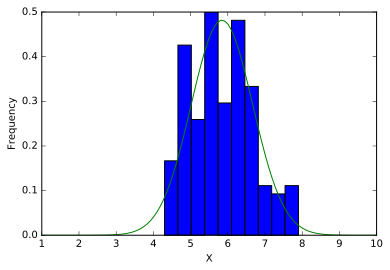

In [5]:
from scipy.stats import norm

# ...

The **Empirical Cumulative Distribution Function** is difined as follows.

$$
\hat{F}(x) = \frac{1}{n} \sum_{i = 1}^n I(x_i \leqslant x)
$$

**Exercise** - Plot the empirical comulative distribution function of the sepal length and compare it with the one from normal distribution.

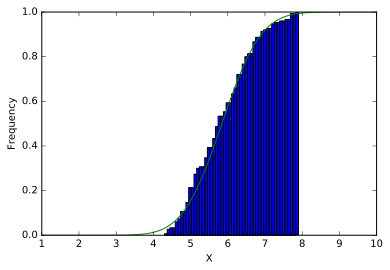

In [6]:
from scipy.stats import norm

# ...

We consider the **bivariate random variable** $X = (X_1, X_2)^T$. In this case, we consider a data matrix $D \in \mathbb{R}^{n \times 2}$:

$$
\*D = 
\begin{pmatrix}
  X_1 & X_2\\
  \hline
  x_{11} & x_{12}\\
  x_{21} & x_{22}\\
  \vdots & \vdots\\
  x_{n1} & x_{n2}
\end{pmatrix}
$$

Where the points $\*x_i$, with $i = 1, 2, \ldots, n$, is a **random sample** drawn from $\*X$. That is to say, $\*x_i$ are independent variables identically distributed as $\*X$.

The **covariance** is used to measure the linear dependence between two variables. The covariancle between $X_1$ and $X_2$ is denoted $\sigma_{12}$ and is equal to 0 is they are independent. The **sample covariance** between $X_1$ and $X_2$ is computed as follows.

$$
\hat{\sigma}_{12} = \frac{1}{n} \sum_{i=1}^n (x_{i1}-\hat{\mu}_1) (x_{i2}-\hat{\mu}_1)
$$

The **correlation** between $X_1$ and $X_2$, denoted $\rho_{12}$, is a standardized covariance. The **sample correlation** is computed as follows.

$$
\hat{\rho}_{12} = \frac{\hat{\sigma}_{12}}{\hat{\sigma}_{1}\hat{\sigma}_{2}}
$$

**Exercise** - Compute the standard correlation between each pair of attribute of the iris data set (see, [pandas.DataFrame.corr](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html)). What do you conclude ? Use scatter plots to complete your conclusion. Which pair of attributes has the largest covariance, and which pair of attributes has the smallest covariance ?

In [103]:
# ...

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1.000000,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1.000000


### Distance

Let us consider the following dataset :

| $\*x_i$      |   Age ($X_1$)     |   Income ($X_2$) | 
|------------|-------------------|------------------| 
| $\*x_1$      |     12            |     300          | 
| $\*x_2$      |     14            |     500          | 
| $\*x_3$      |     18            |     1000         | 
| $\*x_4$      |     23            |     2000         | 
| $\*x_5$      |     27            |     3500         | 
| $\*x_6$      |     28            |     4000         | 
| $\*x_7$      |     34            |     4300         | 
| $\*x_8$      |     37            |     6000         | 
| $\*x_9$      |     39            |     2500         | 
| $\*x_{10}$   |     40            |     2700         | 


In methods like classification and clustering, we have to compute de similarity (or  dissimilarity) between pairs of observations. For example, we could consider the euclidean distance to measure the dissimilarity between each pair of instances in this dataset. This leads to compute the so-called **distance matrix**. See common definitions of distances at the end of this notebook (*apendix* section).

**Exercise** - Declare this data set as a Pandas DataFrame. Based on [pdist](http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html) and [squareform](http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.squareform.html) compute the corresponding distance matrix.

In [106]:
from scipy.spatial.distance import pdist, squareform

# ...

200.0099997500125

### Normalization

The two attributes in this data set have very different scales. The sample range for $X_1$ is $\hat{r} = 40 - 12 = 28$ and the sample range for $X_2$ is $\hat{r} = 2700 - 300 = 2400$. For example, the euclidean distance between $\*x_1$ and $\*x_2$ is $\sqrt{2^2 + 200^2} = 200.01$. As you can see, the contribution of these variables in the dissimilarity measure depends on their scale. The contribution of $X_1$ is therefore overshadowed by the contribution of $X_2$. Two traditional methods can be used to solve this problem :

**Range Normalization**

Let us consider an attribute denoted by $X$ and let $x_1, x_2, \ldots, x_n$ be a random sample drawn from $X$. Each value is scaled by the **sample range** $\hat{r}$ of $X$ :

$$
\begin{align*}
x_i' &= \frac{x_i - \min\{x_j : j = 1,\ldots,n\}}{\hat{r}}\\
     &= \frac{x_i - \min\{x_j : j = 1,\ldots,n\}}{\max\{x_j : j = 1,\ldots,n\} - \min\{x_j : j = 1,\ldots,n\}}
\end{align*}
$$

However, it is worth noting that $\hat{r}$ is **sensitive to extreme values**, and thus **not robust**.

**Standard Score Normalization**

Each value is replaced by its $z$-score:

$$
x_i' = \frac{x_i - \hat{\mu}}{\hat{\sigma}}
$$

**Exercise** - Apply the *standard score normalisation* on this data set and compute the resulting mean and standard deviation.

In [ ]:
# ...

**Exercise** - Compute the distance matrix for the resulting data frame. Compare the two distance matrices visually with the help of [pcolor](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.pcolor).

In [ ]:
# ...

Execute the following code. What do you conclude from it ?

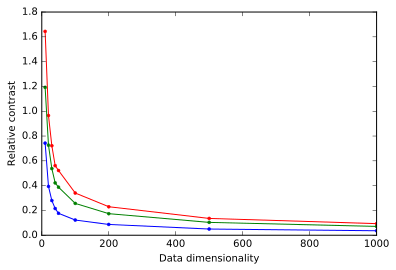

In [10]:
# see "On the Surprising Behavior of Distance Metrics in High Dimensional Space"
# by Charu C. Aggarwal, Alexander Hinneburg, and Daniel A. Keim

dimensions = [10, 20, 30, 40, 50, 100, 200, 500, 1000]
p_norms = [1, 2, 10]

relative_contrasts = np.zeros((len(dimensions), len(p_norms)))

for i, d in enumerate(dimensions):
    relative_contrasts_d = np.zeros((30, len(p_norms)))
    for j in range(30):
        points = np.random.rand(100, d)
        for k, p in enumerate(p_norms):
            dists = np.linalg.norm(points, axis=1, ord=p)
            relative_contrasts_d[j, k] = (max(dists) - min(dists))/min(dists)
    for k, p in enumerate(p_norms):
        relative_contrasts[i, k] = np.mean(relative_contrasts_d[:,k])

colors = ['r', 'g', 'b']
for i, color in enumerate(colors):
    plt.plot(dimensions, relative_contrasts[:,i], color + '-')
    plt.plot(dimensions, relative_contrasts[:,i], color + '.')

plt.ylabel('Relative contrast')
plt.xlabel('Data dimensionality')
plt.show()

# Apendix

## Distances

* Two $d$-dimensional vectors $\*a, \*b \in \mathbb{R}^d$ :

$$
\*a = 
\begin{pmatrix}
  a_1\\
  a_2\\
  \vdots\\
  a_d
\end{pmatrix},\ \*b = 
\begin{pmatrix}
  b_1\\
  b_2\\
  \vdots\\
  b_d
\end{pmatrix}
$$

* *Dot product* :
$$
\begin{align*}
\*a^T\*b &=  
\begin{pmatrix}
  a_{1} & a_{2} & \cdots & a_{d} \\
\end{pmatrix} \times \begin{pmatrix}
  b_1\\
  b_2\\
  \vdots\\
  b_d
\end{pmatrix}\\
&= \sum_{i=1}^d a_ib_i
\end{align*}
$$

* *Euclidean norm* : 
    $$\|a\| = \sqrt{\*a^T\*a} = \sqrt{\sum_{i=1}^da_i^2}$$
* $L_p$-$norm$ (Minkowski):
    $$\|a\|_p = \Big(\sum_{i=1}^d|a_i|^p\Big)^{\frac{1}{p}} $$
* *Euclidean distance* : 
    $$\delta(\*a, \*b) = \|a - b\| = \sqrt{\sum_{i=1}^d(a_i-b_i)^2}$$
* $L_p$-*distance* : 
    $$\delta_p(\*a, \*b) = \|a - b\|_p = \Big(\sum_{i=1}^d(a_i-b_i)^p\Big)^{\frac{1}{p}}$$
* *Cosine similarity* : 
    $$cos\ \theta = \frac{\*a^T\*b}{\|\*a\|\|\*b\|},\ \text{with}\ cos\  \theta \in [-1, 1]$$